In [54]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [55]:
beta = 1.61e-11 # m-1 s-1
L = 7e6 # m (Channel Width)
k0 = 1.5e-6 # m-1 (zonal wavenumber)
c = -2 # m s-1 (zonal phase speed)
# will use c = -5 m s-1 for part d
u0 = 0
r0 = 0

In [56]:
y = np.linspace(0, L, 16)

In [57]:
y

array([      0.        ,  466666.66666667,  933333.33333333,
       1400000.        , 1866666.66666667, 2333333.33333333,
       2800000.        , 3266666.66666667, 3733333.33333333,
       4200000.        , 4666666.66666667, 5133333.33333333,
       5600000.        , 6066666.66666667, 6533333.33333333,
       7000000.        ])

In [58]:
dy = y[1] - y[0]
dy

466666.6666666667

### 2.a.ii.
Use up-down sweep to calculate the solution throughout the grid. Plot the magnitude and phase of psi for all y_n using the radiation condition at the poleward boundary. Show that the magnitude of psi_n approaches unity (one) throughout the entire grid as the grid spacing d goes to zero, and that the magnitude of the reflection coefficient R approaches zero. (Here, just pick two small values of d and sow that the incident magnitude is close to unity and the reflection coefficient approaches zero as d is decreased.) Thus, the solution consists almost entirely (to within numerical error) of a poleward propagating wave. 


### First step is to solve for l everywhere

In [59]:
# assume without loss of generality that u_bar == 0.
lsq = ((beta/(u0 - c)) - k0**2)
lsq # get real and imaginary values but there is no imaginary component so that is why it is two values (the second one
# is zero in the debugging text file.)

5.8e-12

In [60]:
l0 = lsq**(1/2)
l0

2.408318915758459e-06

### First get a_o and b_o using equation (18)

In [61]:
a0 = (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
a0

(0.2633886215268251+0.8034258014348958j)

In [62]:
b0 = (-2j * dy * l0) * (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
b0

(1.805911851337122-0.5920355461240252j)

In [63]:
abs(a0)

0.8454978322628071

In [64]:
abs(b0)

1.9004798611598714

In [65]:
(2 - ((dy**2)*lsq) - a0)**-1

(0.5444437226596085+0.9238012401786445j)

In [66]:
N = 16

a = np.zeros((N), dtype = 'complex')
b = np.zeros((N), dtype = 'complex')

a[0] = a0
b[0] = b0

for j in np.arange(1, N, 1):
    a[j] = (2 - ((dy**2)*lsq) - a[j-1])**-1
    b[j] = b[j-1] * (2 - ((dy**2)*lsq) - a[j-1])**-1


In [67]:
a

array([0.26338862+0.8034258j , 0.54444372+0.92380124j,
       0.21612274+1.0374615j , 0.38646157+0.7699022j ,
       0.48973231+1.07596059j, 0.20279056+0.88281949j,
       0.50167447+0.82922558j, 0.31659911+1.11613938j,
       0.29547711+0.78468156j, 0.54456993+0.96806203j,
       0.19742625+0.99377019j, 0.42191694+0.77723358j,
       0.44784904+1.10512481j, 0.22151281+0.8469396j ,
       0.52433209+0.8616574j , 0.26986751+1.09398216j])

In [68]:
b

array([ 1.80591185-0.59203555j,  1.53014054+1.34597357j,
       -1.06569761+1.8783574j , -1.85800267-0.09456997j,
       -0.80817037-2.04545161j,  1.64187523-1.12826683j,
        1.7592746 +0.79546228j, -0.33086201+2.21543831j,
       -1.83617573+0.39499j   , -1.3823009 -1.56243233j,
        1.2797962 -1.68215459j,  1.84739474+0.28497107j,
        0.51242536+2.16922578j, -1.72369445+0.91450462j,
       -1.691778  -1.00572996j,  0.64369471-2.12218879j])

In [46]:
len(b)

16

In [69]:
a[-2]

(0.5243320937771919+0.8616574029792139j)

In [71]:
lsq, l0

(5.8e-12, 2.408318915758459e-06)

In [16]:
a1 = (2 - ((dy**2)*lsq) - a0)**-1
a1

(0.5444437226596085+0.9238012401786445j)

In [17]:
b1 = b0 * (2 - ((dy**2)*lsq) - a0)**-1
b1


(1.5301405428763037+1.3459735712399665j)

In [48]:
#need to calculate psi_N eqn 22 
psi_N = b[-2] / (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])
psi_N

(0.569909994418416-0.8073050243181463j)

In [72]:
psi_N = b[-2] * (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])**-1
psi_N

(0.569909994418416-0.8073050243181463j)

In [84]:
# now to solve for psi have to go backwards
psi = np.zeros((N), dtype = 'complex')
psi[-1] = psi_N

for j in reversed(np.arange(1, N, 1)):
    psi[j-1] = a[j-1]*psi[j] + b[j-1]

In [85]:
psi
# last value is wrong?

array([ 1.12513188+0.08833577j,  0.51382759+1.01579549j,
       -0.74649804+0.66019264j, -1.0639137 -0.52930687j,
       -0.03748814-1.050233j  ,  1.0362891 -0.24459815j,
        0.80111807+0.86999133j, -0.4459541 +0.8856851j ,
       -1.12973669-0.21733982j, -0.38653631-1.0458404j ,
        0.84490238-0.55332835j,  1.00913549+0.63809889j,
       -0.10128165+1.02353633j, -1.08376881+0.11613366j,
       -0.69733554-0.93795873j,  0.56990999-0.80730502j])

In [111]:
# have to plot magnitude and phase of psi 
import cmath as cm

psi_phase_test = np.zeros((N), dtype = 'complex')

for j in np.arange(1, N):
    psi_phase_test[j] = np.angle(psi[j])

In [120]:
psi_phase_test2 = np.zeros((N), dtype = 'complex')

for j in np.arange(1, N):
    psi_phase_test2[j] = cm.phase(psi[j])

In [88]:
psi_mag = abs(psi)

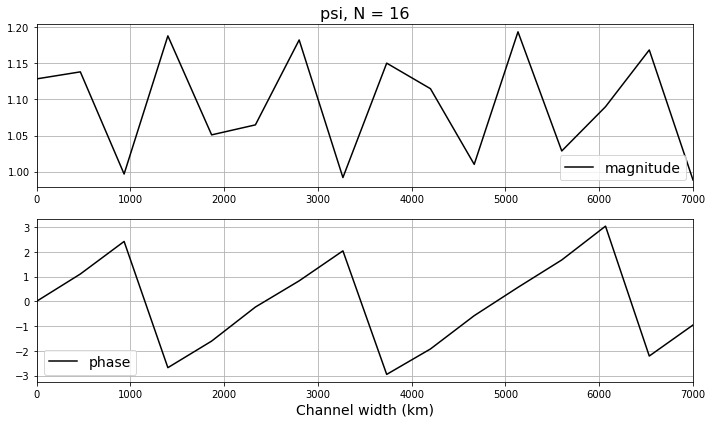

In [147]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y/1000, psi_mag, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 16', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y/1000, psi_phase_test, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.ii.N_16.png')

In [153]:
# Function for question 2. a.ii.
N = 50 ## CHANGE N HERE!!!
y50, mag50, phase50 = get_mag_phase(N)

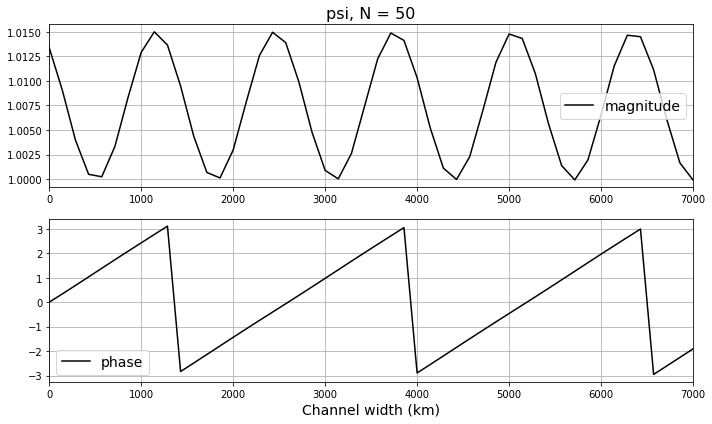

In [154]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y50/1000, mag50, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 50', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
ax[0].set_xlim(0, 7000);
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y50/1000, phase50, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.ii.N_50.png')

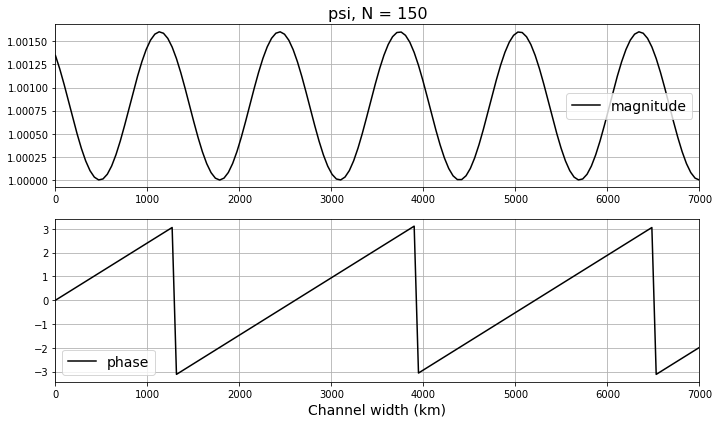

In [151]:
# Function for question 2. a.ii.
N = 150 ## CHANGE N HERE!!!
y150, mag150, phase150 = get_mag_phase(N)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150/1000, mag150, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
ax[0].set_xlim(0, 7000);
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y150/1000, phase150, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.ii.N_150.png')

In [158]:
# Here we show that R, the reflection coefficient (mag - 1) approaches zero as dy decreases (or as N increases)!!
mag50 - 1, psi_mag - 1

(array([ 1.33942219e-02,  9.04529650e-03,  3.96173249e-03,  4.84808995e-04,
         2.33271008e-04,  3.32478095e-03,  8.31841032e-03,  1.29103380e-02,
         1.50075050e-02,  1.36619953e-02,  9.48140393e-03,  4.36671521e-03,
         6.71044808e-04,  1.13692390e-04,  2.95534977e-03,  7.87072240e-03,
         1.25897522e-02,  1.49593655e-02,  1.39080052e-02,  9.91031881e-03,
         4.78257947e-03,  8.81394856e-04,  2.02364569e-05,  2.60183633e-03,
         7.42150404e-03,  1.22511229e-02,  1.48849768e-02,  1.41313996e-02,
         1.03305379e-02,  5.20784539e-03,  1.11510201e-03, -4.67596876e-05,
         2.26550543e-03,  6.97233925e-03,  1.18956274e-02,  1.47845957e-02,
         1.43314055e-02,  1.07405903e-02,  5.64100154e-03,  1.37132563e-03,
        -8.70543236e-05,  1.94756163e-03,  6.52481395e-03,  1.15245029e-02,
         1.46585688e-02,  1.45073313e-02,  1.11390424e-02,  6.08051040e-03,
         1.64914476e-03, -1.00502046e-04]),
 array([ 0.12859424,  0.13835815, -0.0034491

array([ 0.12859424,  0.13835815, -0.00344912,  0.18830893,  0.05090185,
        0.06476447,  0.18265594, -0.00837852,  0.15045278,  0.11498541,
        0.00996648,  0.19395336,  0.02853517,  0.08997333,  0.16877861,
       -0.01180022])

In [131]:
def get_mag_phase(N):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]

    a0 = (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
    b0 = (-2j * dy * l0) * (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    psi[-1] = psi_N

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    # get magnitude
    mag = abs(psi)

    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])

    return(y, mag, phase)    

In [18]:
# l eventually becomes negative so then it becomes complex 


In [43]:
psi

array([ 1.47775129+0.87849514j,  1.53179427+0.91062266j,
       -0.34898911-0.20746741j, -1.78896047-1.0635031j ,
       -0.96927598-0.5762162j ,  1.07471177+0.63889578j,
        1.76121914+1.0470114j ,  0.22311104+0.13263529j,
       -1.59681109-0.94927393j, -1.39978339-0.8321447j ,
        0.56532626+0.33607575j,  1.81636603+1.07979519j,
        0.77313369+0.45961333j, -1.24665241-0.74111123j,
       -1.691778  -1.00572996j,  0.08143377-0.26847794j])

In [41]:
reversed(np.arange(1, N, 1))

In [35]:
psi = np.zeros((N), dtype = 'complex')

for j in np.arange(N, 1, 1):
    psi[j-1] = (a[j]*psi[j-1]) + b[j]

In [36]:
psi

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [19]:
# now to solve for psi have to go backwards
psi = np.zeros((N), dtype = 'complex')

for j in np.flip(np.arange(1, N, 1)):
    psi[j-1] = a[j-1]*psi[j] + b[j-1]

In [20]:
psi

array([ 1.47775129+0.87849514j,  1.53179427+0.91062266j,
       -0.34898911-0.20746741j, -1.78896047-1.0635031j ,
       -0.96927598-0.5762162j ,  1.07471177+0.63889578j,
        1.76121914+1.0470114j ,  0.22311104+0.13263529j,
       -1.59681109-0.94927393j, -1.39978339-0.8321447j ,
        0.56532626+0.33607575j,  1.81636603+1.07979519j,
        0.77313369+0.45961333j, -1.24665241-0.74111123j,
       -1.691778  -1.00572996j,  0.        +0.j        ])

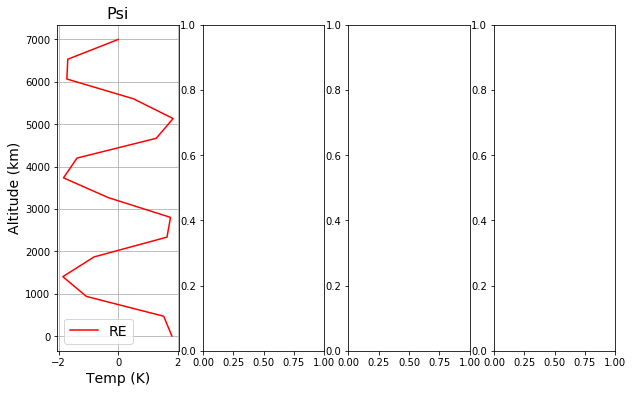

In [28]:
fig, ax = plt.subplots(ncols = 4, figsize = (10,6))

ax[0].plot(psi, y/1000, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('Psi', fontsize = 16)
ax[0].set_xlabel('Temp (K)', fontsize = 14)
ax[0].set_ylabel('Altitude (km)', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['RE', 'RCE'], fontsize = 14)

#ax[1].plot(Fd_RE_zs, RE_zs/1000, 'r', Fd_zs, RCE_zs/1000, 'b')
##plt.plot(T_surf, tao_values)
#ax[1].set_title('Fd', fontsize = 16)
#ax[1].set_xlabel('Energy (Wm-2)', fontsize = 14)
#ax[1].set_ylabel(' ', fontsize = 14);
#ax[1].grid();
#ax[1].set_yticklabels([]);
##ax.set_ylim(0, 20);
##ax.set_xlim(150, 350)
##plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
##plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
##plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
##ax[1].legend(['Fd', 'Fu'], fontsize = 14)

#ax[2].plot(Fu_RE_zs, RE_zs/1000, 'r', Fu_zs, RCE_zs/1000, 'b')
##plt.plot(T_surf, tao_values)
#ax[2].set_title('Fu', fontsize = 16)
#ax[2].set_xlabel('Energy (Wm-2)', fontsize = 14)
#ax[2].set_ylabel(' ', fontsize = 14);
#ax[2].grid()
#ax[2].set_yticklabels([]);
##ax.set_ylim(0, 20);
##ax.set_xlim(150, 350)
##plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
##plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
##plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
##ax[2].legend(['Fu'], fontsize = 14)

#ax[3].plot(QR_RE, RE_zs/1000, 'r', QR, RCE_zs/1000, 'b')
##plt.plot(T_surf, tao_values)
#ax[3].set_title('Qr', fontsize = 16)
#ax[3].set_xlabel('Temp (K/day)', fontsize = 14)
#ax[3].set_ylabel(' ', fontsize = 14);
#ax[3].grid()
#ax[3].set_yticklabels([]);
#ax[3].set_xlim(-4, 4)

#fig.savefig('atmos_dynamics_hw1_2aii.png')